<h2> Optisystem Optical Fiber Analysis </h2>

Note that to run a cell in this notebook do Ctrl + Enter

<h4> Obtaining the propagation delay of the fiber channel </h4>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\tomha\AppData\Local\Temp\ipykernel_3544\696738033.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  input_pulse_data = pd.read_csv("../single_pulse_data_input.txt",
C:\Users\tomha\AppData\Local\Temp\ipykernel_3544\696738033.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  output_pulse_data = pd.read_csv("../single_pulse_data_output.txt",


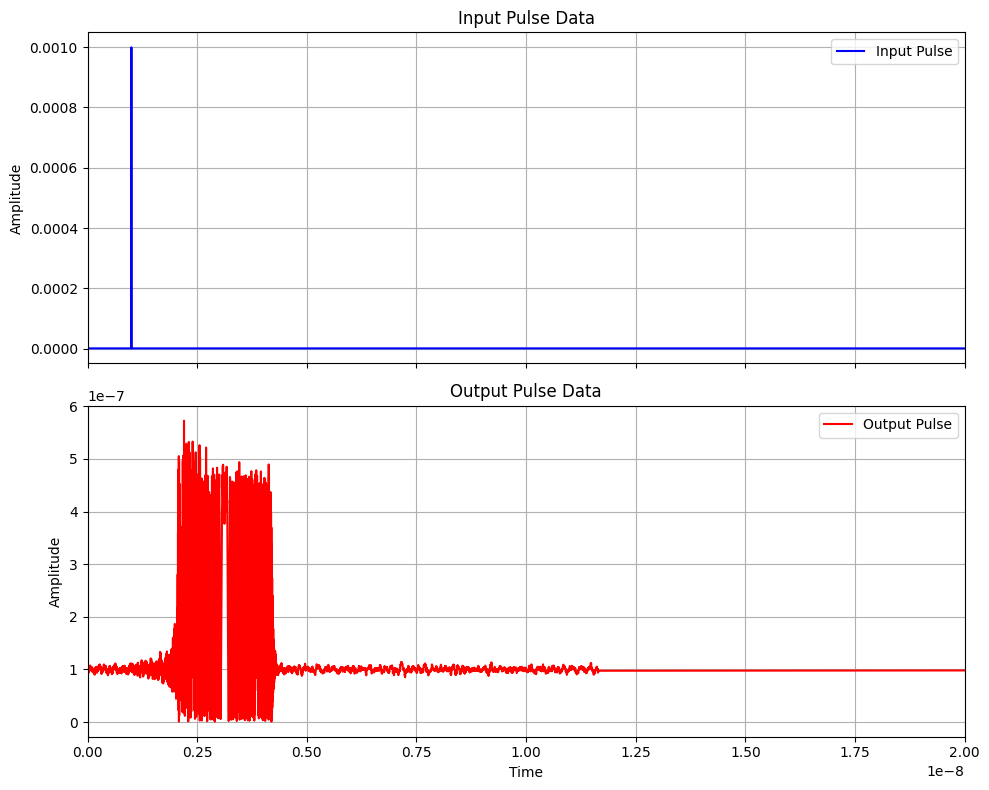

Input Peak index: 320
Input Peak Time: 1e-09
Output Peak index: 704
Uutput_peak_time: 2.2e-09
Estimated time shift (output - input): 1.200 ns


In [22]:
# Set the plotting style to default with white backgrounds.
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

# Read the data files and convert the columns to float.
input_pulse_data = pd.read_csv("../single_pulse_data_input.txt",
                               delim_whitespace=True,
                               header=None,
                               names=["Time", "Amplitude"]).astype(float).to_numpy()

output_pulse_data = pd.read_csv("../single_pulse_data_output.txt",
                                delim_whitespace=True,
                                header=None,
                                names=["Time", "Amplitude"]).astype(float).to_numpy()

# Define the desired x-axis limits (in seconds, for example).
# Here we want to show from 0 to 0.4e-7.
x_min = 0
x_max = 2e-8

# Create subplots that share the same x-axis
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot the input pulse data
axs[0].plot(input_pulse_data[:, 0], input_pulse_data[:, 1], label="Input Pulse", color='b')
axs[0].set_title('Input Pulse Data', color='black')
axs[0].set_ylabel('Amplitude', color='black')
axs[0].grid(True)
axs[0].legend()
axs[0].tick_params(axis='both', colors='black')
axs[0].set_xlim(x_min, x_max)  # Set x-axis limits for input plot

# Plot the output pulse data
axs[1].plot(output_pulse_data[:, 0], output_pulse_data[:, 1], label="Output Pulse", color='r')
axs[1].set_title('Output Pulse Data', color='black')
axs[1].set_xlabel('Time', color='black')
axs[1].set_ylabel('Amplitude', color='black')
axs[1].grid(True)
axs[1].legend()
axs[1].tick_params(axis='both', colors='black')
axs[1].set_xlim(x_min, x_max)  # Set x-axis limits for output plot

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Identify the time shift between input and output by comparing the peak locations.
input_peak_index = np.argmax(input_pulse_data[:, 1])
output_peak_index = np.argmax(output_pulse_data[:, 1])
input_peak_time = input_pulse_data[input_peak_index, 0]
output_peak_time = output_pulse_data[output_peak_index, 0]
print(f"Input Peak index: {input_peak_index}")
print(f"Input Peak Time: {input_peak_time}")


print(f"Output Peak index: {output_peak_index}")
print(f"Uutput_peak_time: {output_peak_time}")

time_shift = output_peak_time - input_peak_time

# Convert the time shift from seconds to nanoseconds.
time_shift_ns = time_shift * 1e9

print(f"Estimated time shift (output - input): {time_shift_ns:.3f} ns")

# Provide some interpretation:
if time_shift < 0:
    print("Note: A negative time shift indicates that the peak of the output impulse occurs "
          "before the input pulse's peak. This could be due to measurement offsets or "
          "data processing issues, so please verify the data and processing pipeline.")


As we can see above, Chromatic Dispersion is taking place, as the light pulse is spread out. This makes obtaining the propagation delay difficult, as it is wavelength dependent